## Capstone Project:- Providing data-driven suggestions for HR

This capstone project builds a predictive model that can provide insights to the HR department of a large consulting firm.

Project Stages
1) $PLAN:$ Understand data in the problem context.
2) $ANALYZE:$ EDA, check model assumptions, and select model.
3) $CONSTRUCT:$ Construct & evaluate model.
4) $EXECUTE:$ Interpret model & share story.

Problem:- The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected
data from employees, but now don’t know what to do with it. As a data professional, they ask you to provide data-driven suggestions based on your understanding of the data. They have the following question:
-what’s likely to make the employee leave the company?

Goal: - To analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

Impact: - If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time consuming and expensive to find, interview, and hire new employees, increasing employee retention will benefit the company.

## Step 1: Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

C:\Users\uttam\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score,\
ConfusionMatrixDisplay, classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

In [5]:
import pickle

In [6]:
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head()

satisfaction_level  last_performance_rating  number_of_projects  \
0                0.38                     0.53                   2   
1                0.80                     0.86                   5   
2                0.11                     0.88                   7   
3                0.72                     0.87                   5   
4                0.37                     0.52                   2   

   avg_monthly_hours  years_at_company  had_work_accident  has_left_company  \
0                157                 3                  0                 1   
1                262                 6                  0                 1   
2                272                 4                  0                 1   
3                223                 5                  0                 1   
4                159                 3                  0                 1   

   promoted_in_last_5_years Department salary_level  
0                         0      sales          low  
1                         0      sales       medium  
2                         0      sales       medium  
3                         0      sales          low  
4                         0      sales          low

## Step 2: Data Exploration(Initial EDA and Data cleaning)

In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   satisfaction_level        14999 non-null  float64
 1   last_performance_rating   14999 non-null  float64
 2   number_of_projects        14999 non-null  int64  
 3   avg_monthly_hours         14999 non-null  int64  
 4   years_at_company          14999 non-null  int64  
 5   had_work_accident         14999 non-null  int64  
 6   has_left_company          14999 non-null  int64  
 7   promoted_in_last_5_years  14999 non-null  int64  
 8   Department                14999 non-null  object 
 9   salary_level              14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df0.describe()

satisfaction_level  last_performance_rating  number_of_projects  \
count        14999.000000             14999.000000        14999.000000   
mean             0.612834                 0.716102            3.803054   
std              0.248631                 0.171169            1.232592   
min              0.090000                 0.360000            2.000000   
25%              0.440000                 0.560000            3.000000   
50%              0.640000                 0.720000            4.000000   
75%              0.820000                 0.870000            5.000000   
max              1.000000                 1.000000            7.000000   

       avg_monthly_hours  years_at_company  had_work_accident  \
count       14999.000000      14999.000000       14999.000000   
mean          201.050337          3.498233           0.144610   
std            49.943099          1.460136           0.351719   
min            96.000000          2.000000           0.000000   
25%           156.000000          3.000000           0.000000   
50%           200.000000          3.000000           0.000000   
75%           245.000000          4.000000           0.000000   
max           310.000000         10.000000           1.000000   

       has_left_company  promoted_in_last_5_years  
count      14999.000000              14999.000000  
mean           0.238083                  0.021268  
std            0.425924                  0.144281  
min            0.000000                  0.000000  
25%            0.000000                  0.000000  
50%            0.000000                  0.000000  
75%            0.000000                  0.000000  
max            1.000000                  1.000000

In [9]:
df0.columns

Index(['satisfaction_level', 'last_performance_rating', 'number_of_projects',
       'avg_monthly_hours', 'years_at_company', 'had_work_accident',
       'has_left_company', 'promoted_in_last_5_years', 'Department',
       'salary_level'],
      dtype='object')

In [10]:
df0 = df0.rename(columns = {'Department':'department'})
df0.columns

Index(['satisfaction_level', 'last_performance_rating', 'number_of_projects',
       'avg_monthly_hours', 'years_at_company', 'had_work_accident',
       'has_left_company', 'promoted_in_last_5_years', 'department',
       'salary_level'],
      dtype='object')

In [11]:
df0.isna().sum()

satisfaction_level          0
last_performance_rating     0
number_of_projects          0
avg_monthly_hours           0
years_at_company            0
had_work_accident           0
has_left_company            0
promoted_in_last_5_years    0
department                  0
salary_level                0
dtype: int64

In [12]:
df0.duplicated().sum()

3008

In [13]:
df0[df0.duplicated()].head()

satisfaction_level  last_performance_rating  number_of_projects  \
396                 0.46                     0.57                   2   
866                 0.41                     0.46                   2   
1317                0.37                     0.51                   2   
1368                0.41                     0.52                   2   
1461                0.42                     0.53                   2   

      avg_monthly_hours  years_at_company  had_work_accident  \
396                 139                 3                  0   
866                 128                 3                  0   
1317                127                 3                  0   
1368                132                 3                  0   
1461                142                 3                  0   

      has_left_company  promoted_in_last_5_years  department salary_level  
396                  1                         0       sales          low  
866                  1                         0  accounting          low  
1317                 1                         0       sales       medium  
1368                 1                         0       RandD          low  
1461                 1                         0       sales          low

In [14]:
df1 = df0.drop_duplicates(keep='first')
df1.head()

satisfaction_level  last_performance_rating  number_of_projects  \
0                0.38                     0.53                   2   
1                0.80                     0.86                   5   
2                0.11                     0.88                   7   
3                0.72                     0.87                   5   
4                0.37                     0.52                   2   

   avg_monthly_hours  years_at_company  had_work_accident  has_left_company  \
0                157                 3                  0                 1   
1                262                 6                  0                 1   
2                272                 4                  0                 1   
3                223                 5                  0                 1   
4                159                 3                  0                 1   

   promoted_in_last_5_years department salary_level  
0                         0      sales          low  
1                         0      sales       medium  
2                         0      sales       medium  
3                         0      sales          low  
4                         0      sales          low

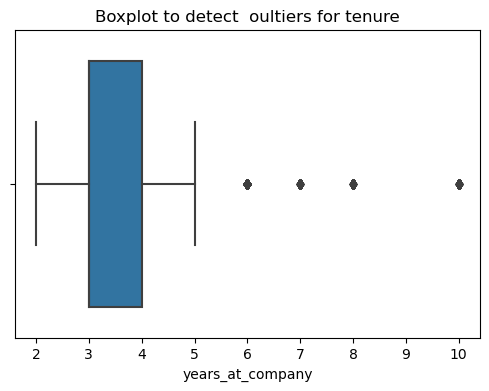

In [15]:
plt.figure(figsize=(6,4))
plt.title("Boxplot to detect  oultiers for tenure",fontsize = 12)
sns.boxplot(x = df1['years_at_company'])
plt.show()

In [16]:
percentile25 = df1['years_at_company'].quantile(0.25)
percentile75 = df1['years_at_company'].quantile(0.75)
IQR = percentile75 - percentile25

In [17]:
upper_limit = percentile75 + 1.5*IQR
lower_limit = percentile25 - 1.5*IQR
print("Upper Limit:- ",upper_limit)
print("Lower Limit:- ",lower_limit)

Upper Limit:-  5.5
Lower Limit:-  1.5


In [18]:
outliers = df1[(df1['years_at_company'] > upper_limit ) | (df1['years_at_company'] < lower_limit)]
print("Number of rows in the data containing outliers for 'tenure' is: ",len(outliers))

Number of rows in the data containing outliers for 'tenure' is:  824


In [19]:
df1['has_left_company'].value_counts()

0    10000
1     1991
Name: has_left_company, dtype: int64

In [20]:
df1['has_left_company'].value_counts(normalize = True)

0    0.833959
1    0.166041
Name: has_left_company, dtype: float64

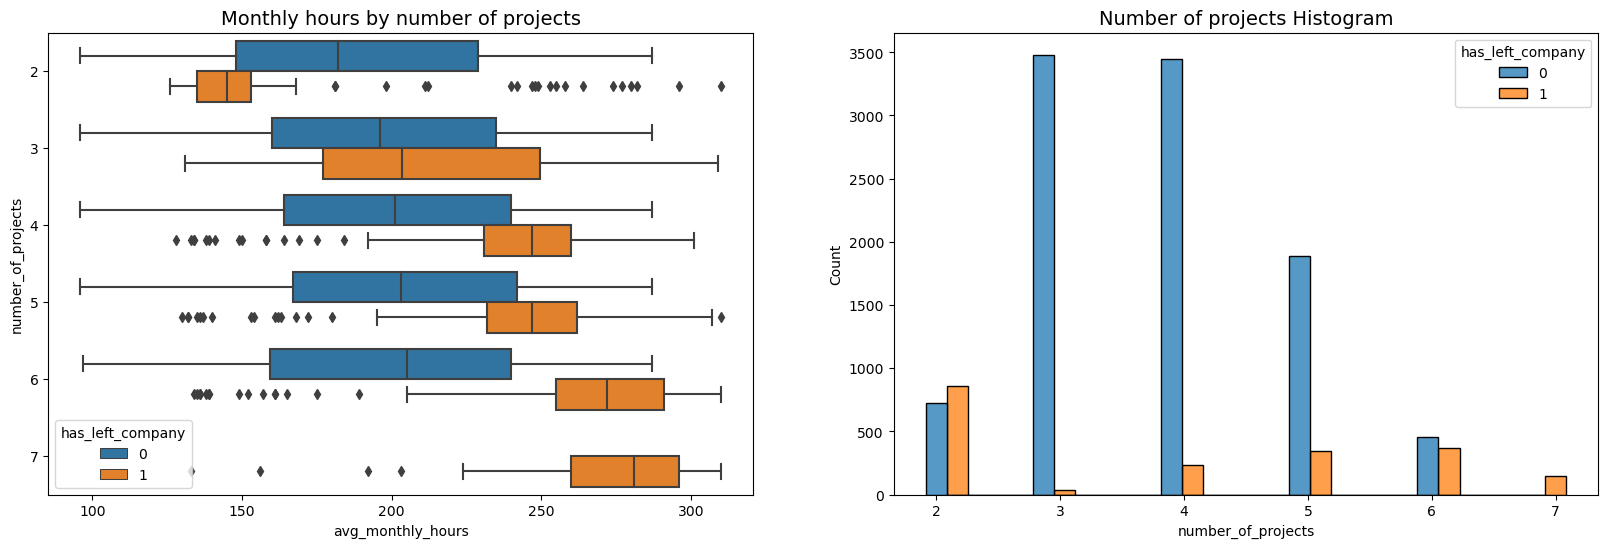

In [21]:
fig ,ax = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(data = df1, x = 'avg_monthly_hours', y = 'number_of_projects', hue = 'has_left_company', orient = 'h', ax = ax[0])
ax[0].set_title("Monthly hours by number of projects", fontsize = '14')

tenure_stay = df1[df1['has_left_company'] == 0]['number_of_projects']
tenure_left = df1[df1['has_left_company'] == 1]['number_of_projects']
sns.histplot(data= df1, x = 'number_of_projects', hue = 'has_left_company', multiple = 'dodge',shrink = 2, ax= ax[1])
ax[1].set_title("Number of projects Histogram",fontsize = '14')

plt.show()


In [22]:
df1[df1['number_of_projects'] == 7]['has_left_company'].value_counts()

1    145
Name: has_left_company, dtype: int64

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

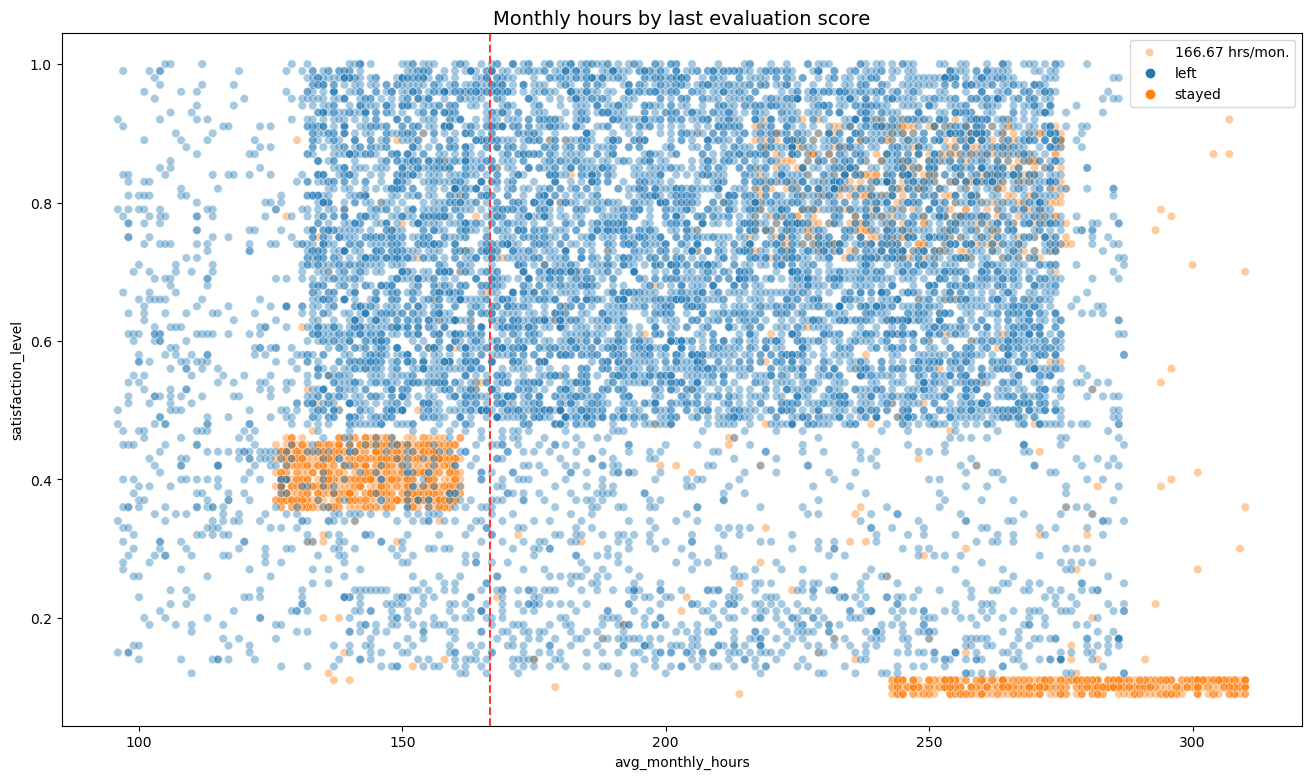

In [23]:
plt.figure(figsize=(16,9))
sns.scatterplot(data =df1, x= 'avg_monthly_hours',y = 'satisfaction_level', hue = 'has_left_company',alpha = 0.4)
plt.axvline(x=166.67,color = '#ff3631',label = '166.67 hrs/mon.',ls= '--')
plt.legend(labels = ['166.67 hrs/mon.','left','stayed'])
plt.title("Monthly hours by last evaluation score", fontsize='14')

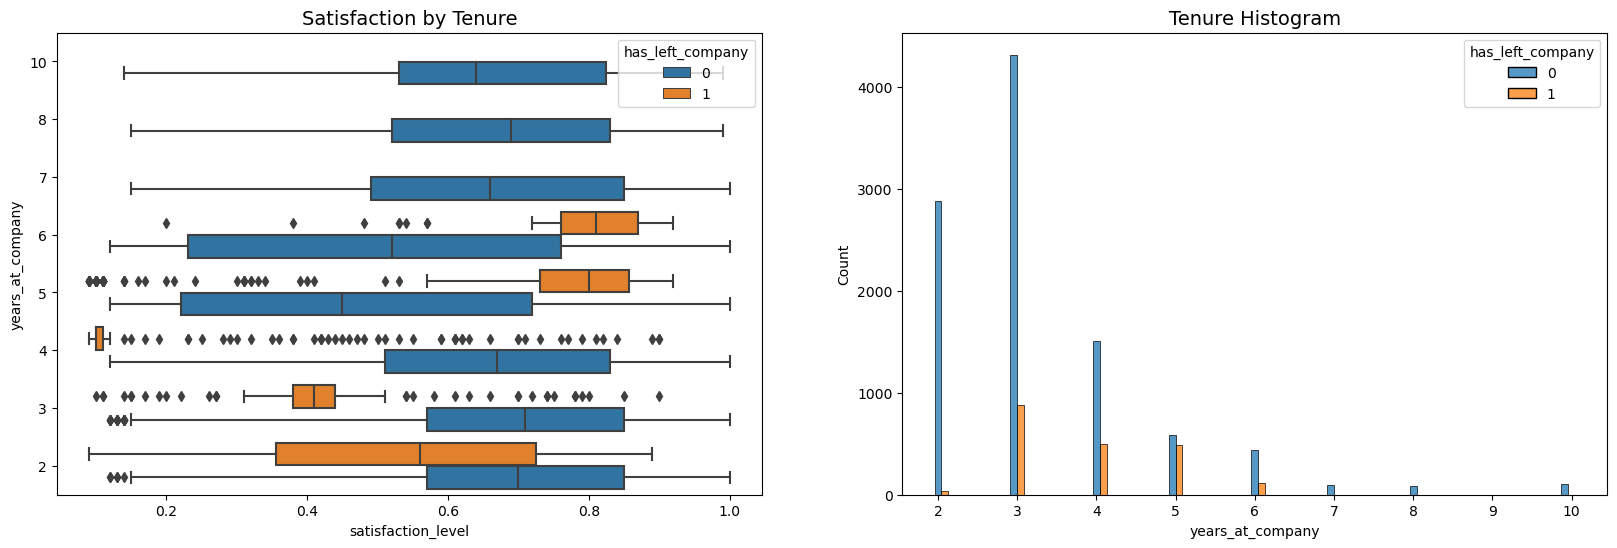

In [24]:
fig ,ax = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(data = df1, x = 'satisfaction_level', y = 'years_at_company', hue = 'has_left_company', orient = 'h', ax = ax[0])
ax[0].set_title("Satisfaction by Tenure", fontsize = '14')
ax[0].invert_yaxis()

tenure_stay = df1[df1['has_left_company'] == 0]['years_at_company']
tenure_left = df1[df1['has_left_company'] == 1]['years_at_company']
sns.histplot(data= df1, x = 'years_at_company', hue = 'has_left_company', multiple = 'dodge',shrink = 2, ax= ax[1])
ax[1].set_title("Tenure Histogram",fontsize = '14')

plt.show()


In [25]:
df1.groupby(['has_left_company'])['satisfaction_level'].agg([np.mean,np.median])

mean  median
has_left_company                  
0                 0.667365    0.69
1                 0.440271    0.41

Text(0.5, 1.0, 'Salary histogram by tenure: long tenure people')

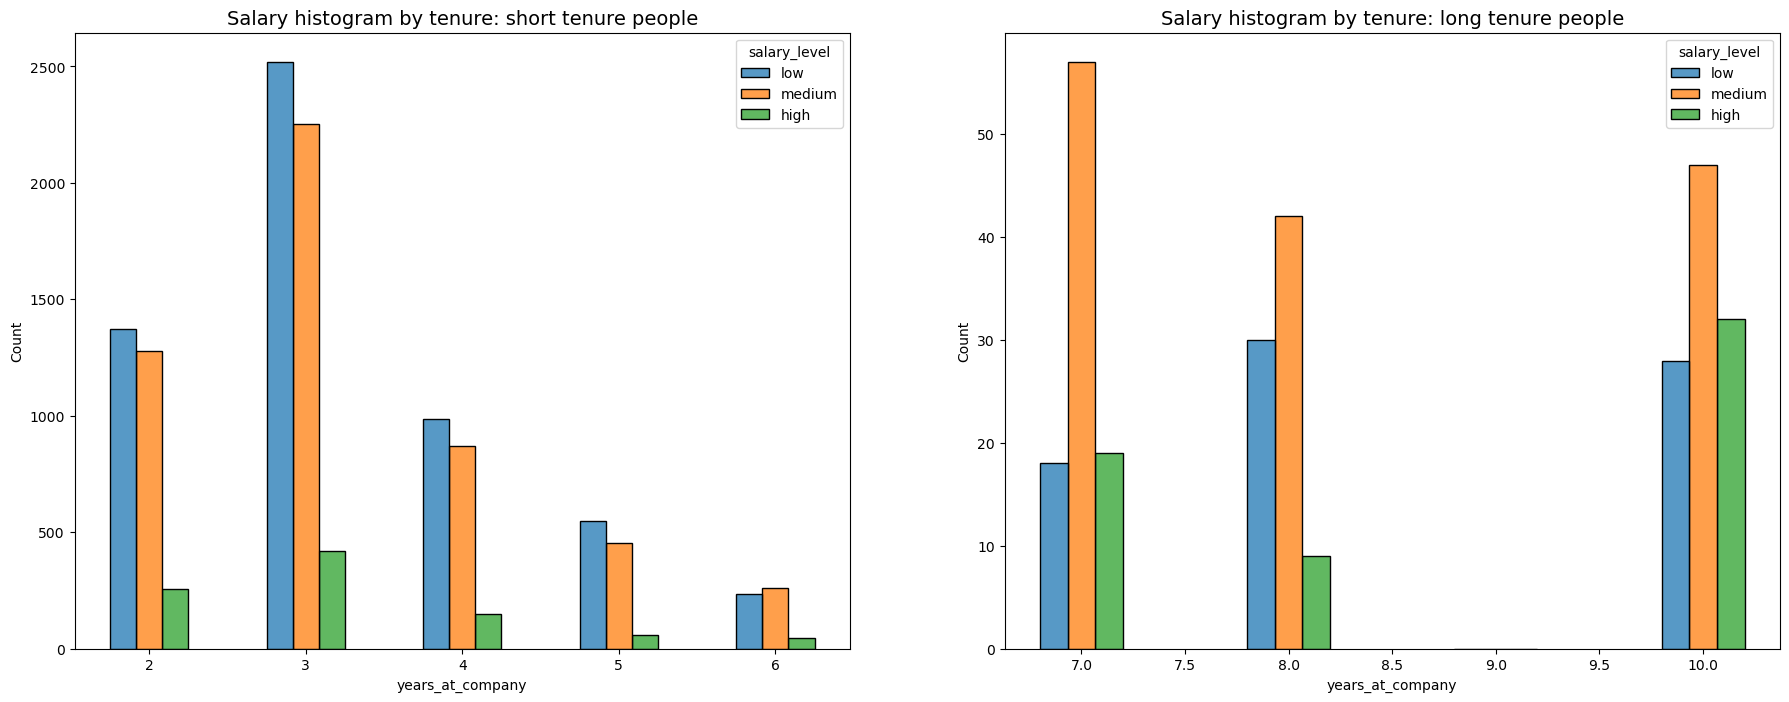

In [26]:
fig,ax = plt.subplots(1,2,figsize=(22,8))

short_tenure = df1[df1['years_at_company'] < 7]
long_tenure = df1[df1['years_at_company'] > 6]

sns.histplot(data = short_tenure, x = 'years_at_company', hue = 'salary_level', discrete = 1, hue_order = ['low','medium','high'], multiple='dodge',shrink =.5,ax = ax[0])
ax[0].set_title('Salary histogram by tenure: short tenure people',fontsize='14')

sns.histplot(data = long_tenure, x = 'years_at_company', hue = 'salary_level', discrete = 1, hue_order = ['low','medium','high'], multiple='dodge',shrink =.4,ax = ax[1])
ax[1].set_title('Salary histogram by tenure: long tenure people',fontsize='14')


Text(0.5, 1.0, 'Monthly hours by last evaluation score')

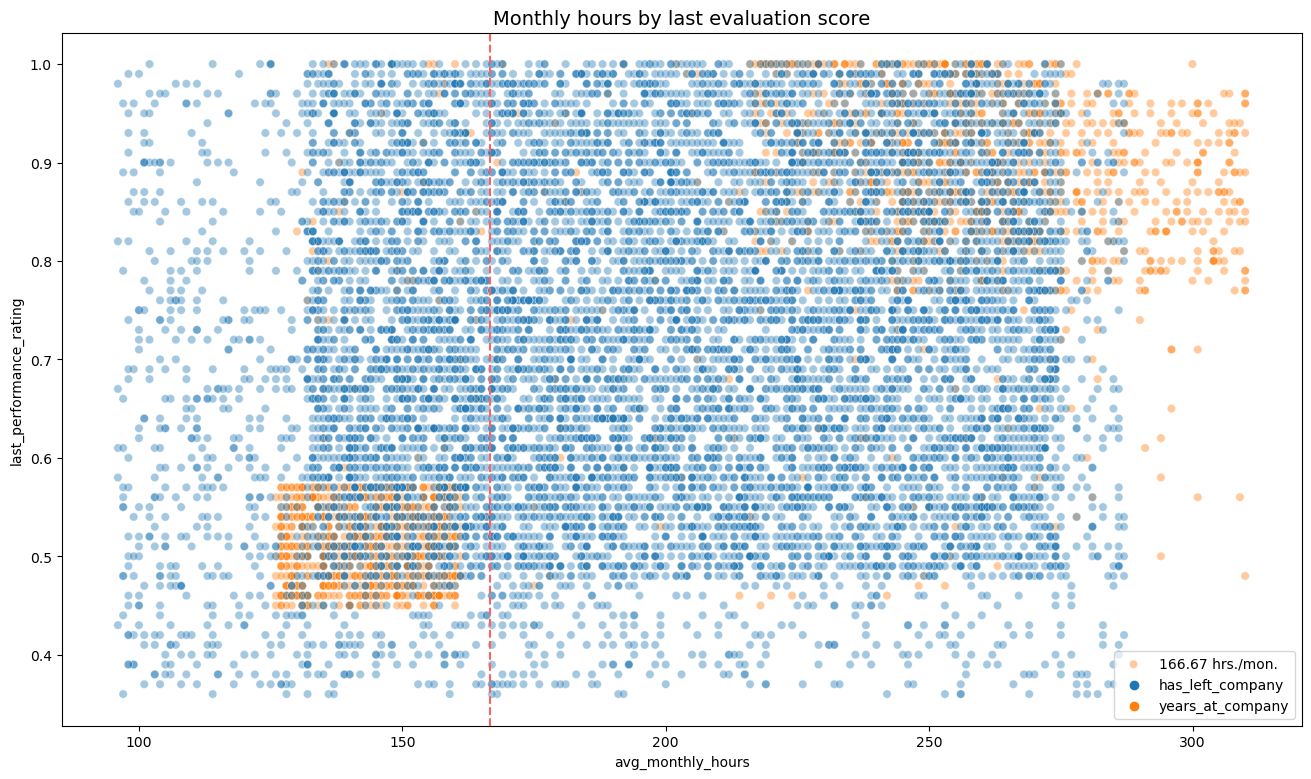

In [27]:
plt.figure(figsize=(16,9))
sns.scatterplot(data = df1, x = 'avg_monthly_hours', y = 'last_performance_rating', hue = 'has_left_company', alpha = 0.4)
plt.axvline(x = 166.67, color='#ff6361',label = '166.67 hrs./mon',ls = '--')
plt.legend(labels= ['166.67 hrs./mon.','has_left_company','years_at_company'])
plt.title("Monthly hours by last evaluation score",fontsize='14')

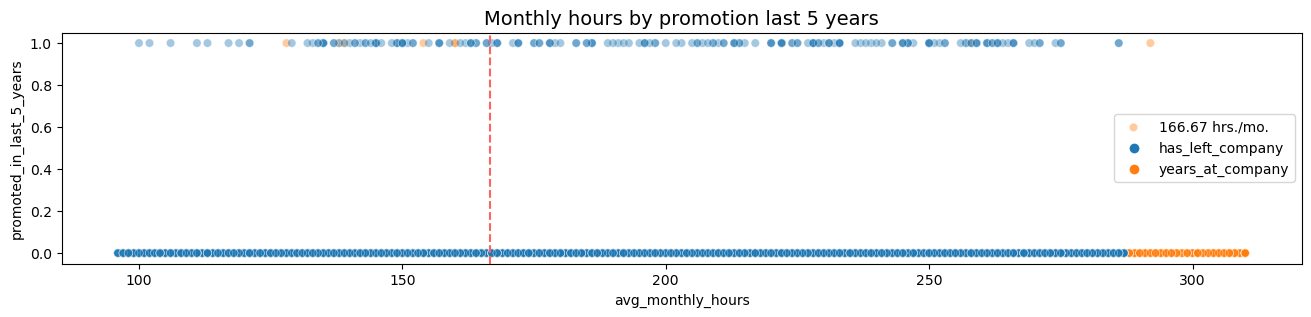

In [28]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='avg_monthly_hours', y='promoted_in_last_5_years', hue='has_left_company', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'has_left_company', 'years_at_company'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

In [29]:
df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

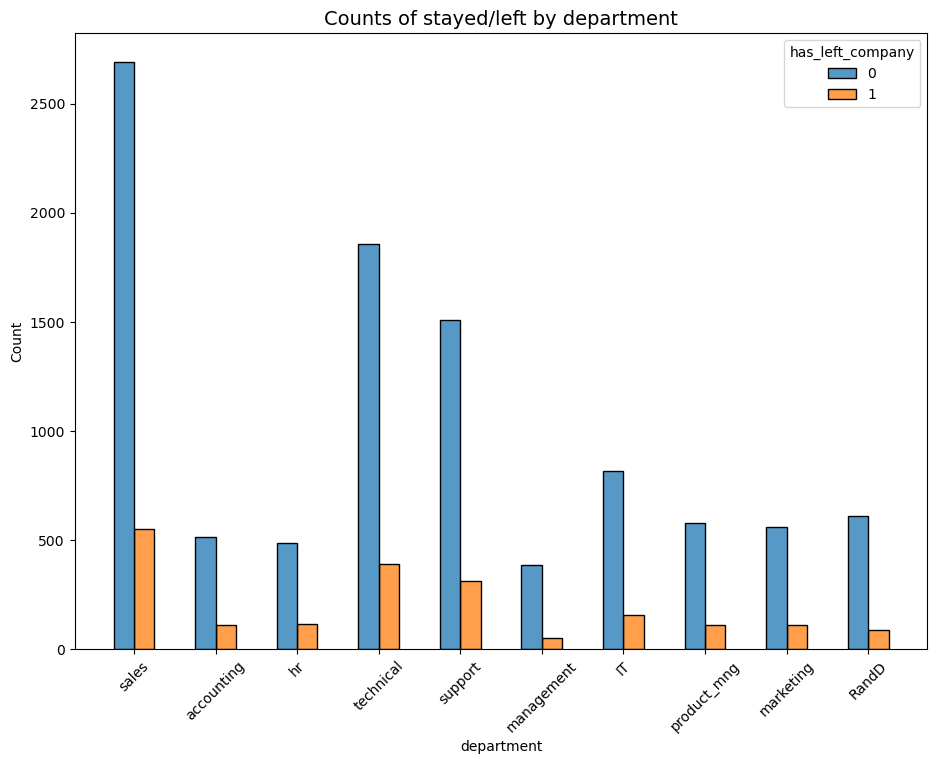

In [30]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='has_left_company', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);

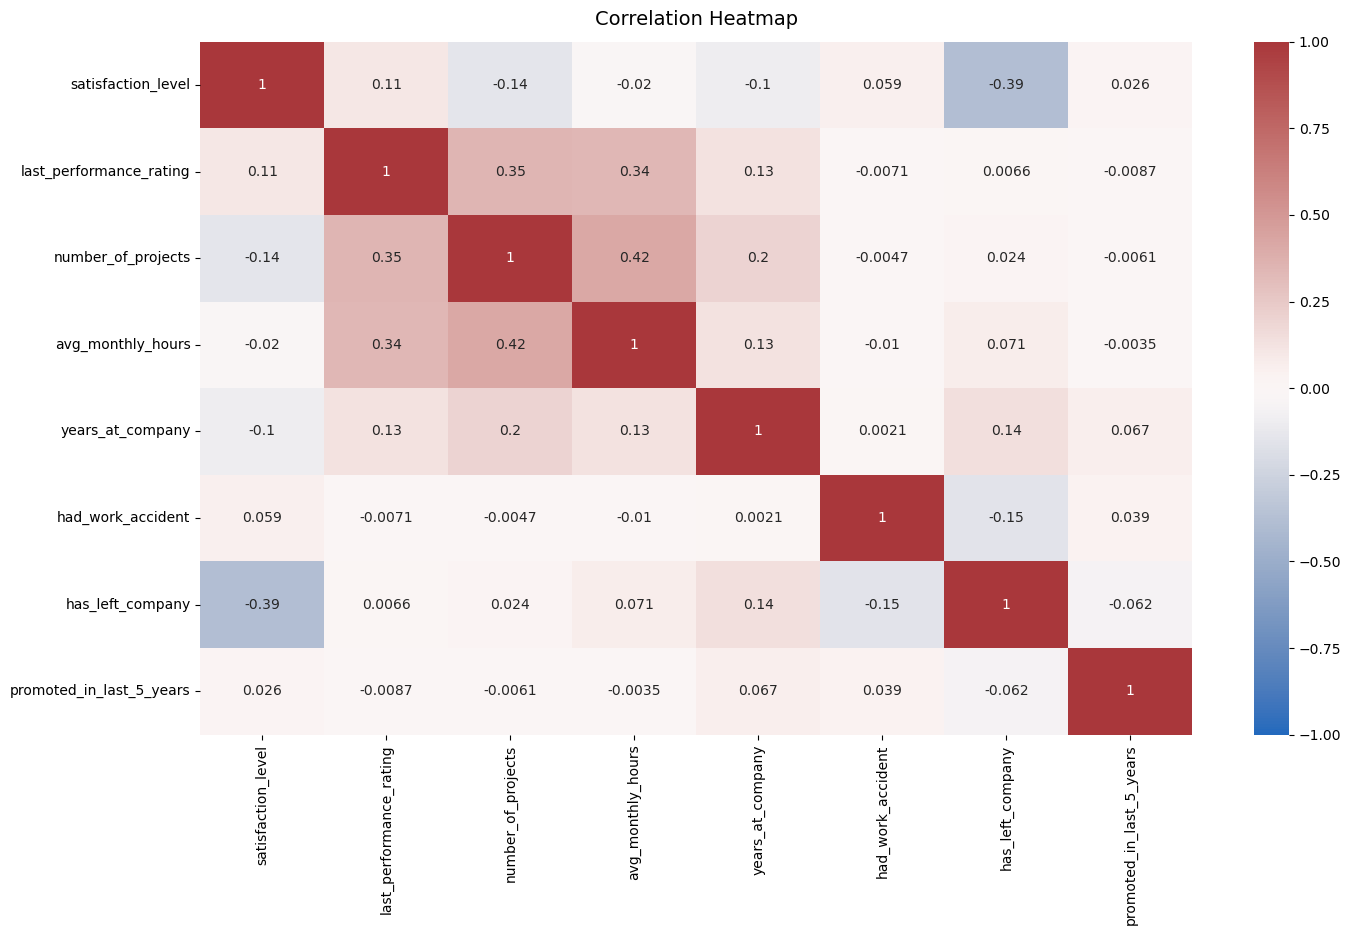

In [31]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

- It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

In [32]:
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary_level'] = (
    df_enc['salary_level'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

satisfaction_level  last_performance_rating  number_of_projects  \
0                0.38                     0.53                   2   
1                0.80                     0.86                   5   
2                0.11                     0.88                   7   
3                0.72                     0.87                   5   
4                0.37                     0.52                   2   

   avg_monthly_hours  years_at_company  had_work_accident  has_left_company  \
0                157                 3                  0                 1   
1                262                 6                  0                 1   
2                272                 4                  0                 1   
3                223                 5                  0                 1   
4                159                 3                  0                 1   

   promoted_in_last_5_years  salary_level  department_IT  department_RandD  \
0                         0             0              0                 0   
1                         0             1              0                 0   
2                         0             1              0                 0   
3                         0             0              0                 0   
4                         0             0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  
0                   0                     0  
1                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0

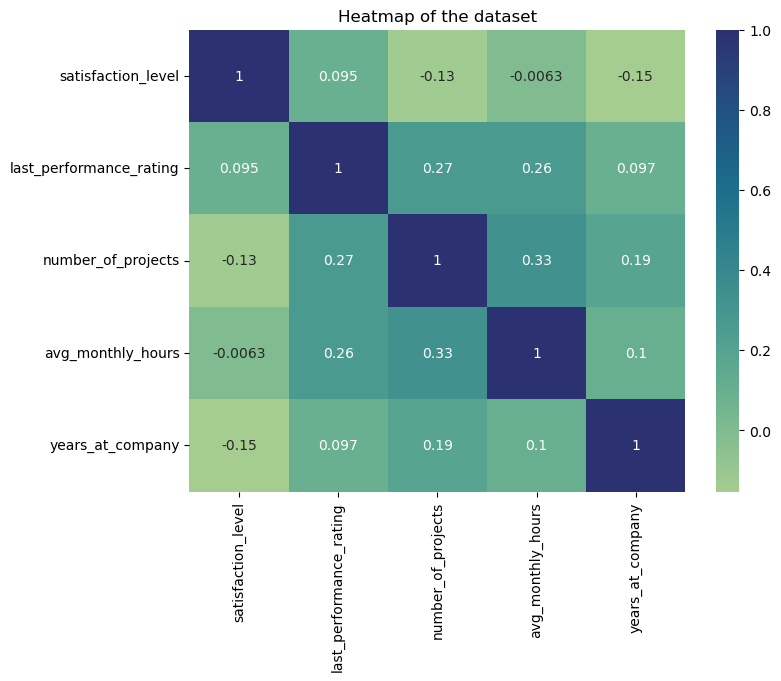

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_performance_rating', 'number_of_projects', 'avg_monthly_hours', 'years_at_company']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

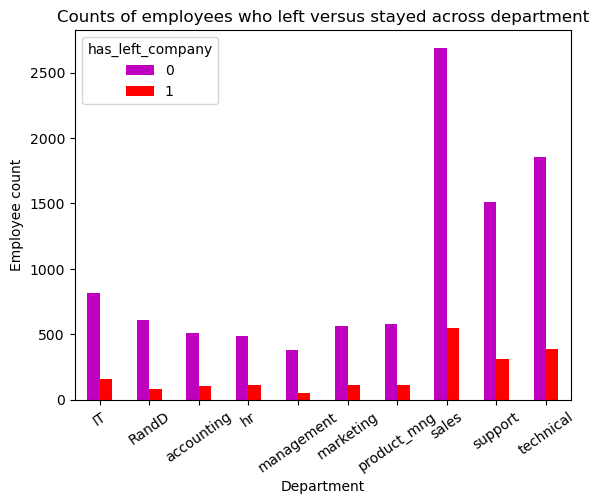

In [34]:
#plt.figure(figsize=(42,6))
pd.crosstab(df1['department'], df1['has_left_company']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.xticks(rotation=35)
plt.show()

In [35]:
df_logreg = df_enc[(df_enc['years_at_company'] >= lower_limit) & (df_enc['years_at_company'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

satisfaction_level  last_performance_rating  number_of_projects  \
0                0.38                     0.53                   2   
2                0.11                     0.88                   7   
3                0.72                     0.87                   5   
4                0.37                     0.52                   2   
5                0.41                     0.50                   2   

   avg_monthly_hours  years_at_company  had_work_accident  has_left_company  \
0                157                 3                  0                 1   
2                272                 4                  0                 1   
3                223                 5                  0                 1   
4                159                 3                  0                 1   
5                153                 3                  0                 1   

   promoted_in_last_5_years  salary_level  department_IT  department_RandD  \
0                         0             0              0                 0   
2                         0             1              0                 0   
3                         0             0              0                 0   
4                         0             0              0                 0   
5                         0             0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   
5                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   
5                     0                       0                 1   

   department_support  department_technical  
0                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0  
5                   0                     0

In [36]:
y = df_logreg['has_left_company']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: has_left_company, dtype: int64

In [37]:
X = df_logreg.drop('has_left_company', axis=1)
X.head()

satisfaction_level  last_performance_rating  number_of_projects  \
0                0.38                     0.53                   2   
2                0.11                     0.88                   7   
3                0.72                     0.87                   5   
4                0.37                     0.52                   2   
5                0.41                     0.50                   2   

   avg_monthly_hours  years_at_company  had_work_accident  \
0                157                 3                  0   
2                272                 4                  0   
3                223                 5                  0   
4                159                 3                  0   
5                153                 3                  0   

   promoted_in_last_5_years  salary_level  department_IT  department_RandD  \
0                         0             0              0                 0   
2                         0             1              0                 0   
3                         0             0              0                 0   
4                         0             0              0                 0   
5                         0             0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   
5                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   
5                     0                       0                 1   

   department_support  department_technical  
0                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0  
5                   0                     0

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [39]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [40]:
y_pred = log_clf.predict(X_test)

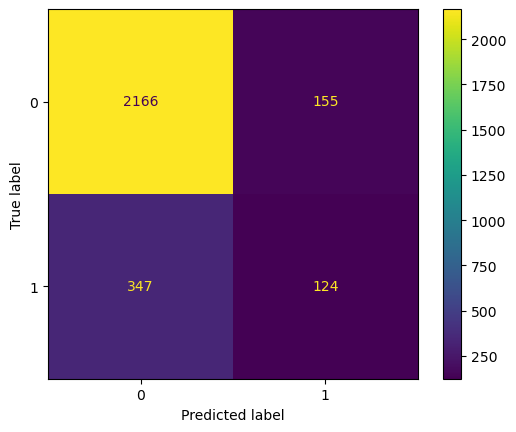

In [41]:
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [42]:
df_logreg['has_left_company'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: has_left_company, dtype: float64

In [43]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



**Modeling Approach B: Tree-Based Model** This approach covers the Decision Tree and Random Forest Model.

In [44]:
y = df_enc['has_left_company']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: has_left_company, dtype: int64

In [45]:
X = df_enc.drop('has_left_company',axis=1)
X.head()

satisfaction_level  last_performance_rating  number_of_projects  \
0                0.38                     0.53                   2   
1                0.80                     0.86                   5   
2                0.11                     0.88                   7   
3                0.72                     0.87                   5   
4                0.37                     0.52                   2   

   avg_monthly_hours  years_at_company  had_work_accident  \
0                157                 3                  0   
1                262                 6                  0   
2                272                 4                  0   
3                223                 5                  0   
4                159                 3                  0   

   promoted_in_last_5_years  salary_level  department_IT  department_RandD  \
0                         0             0              0                 0   
1                         0             1              0                 0   
2                         0             1              0                 0   
3                         0             0              0                 0   
4                         0             0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  
0                   0                     0  
1                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=0)

In [47]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4,6,8,None],
            'min_samples_leaf':[2,5,1],
            'min_samples_split':[2,4,6]}

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy','precision','recall','f1','roc_auc'}

tree1 = GridSearchCV(tree,cv_params,scoring = scoring,cv=4,refit='roc_auc')

In [48]:
%%time
tree1.fit(X_train,y_train)

CPU times: total: 5.39 s
Wall time: 6.28 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'precision', 'roc_auc', 'recall', 'accuracy'})

In [49]:
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [50]:
tree1.best_score_

0.969819392792457

In [51]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [52]:
tree1_results_cv = make_results('decision tree cv',tree1,'auc')
tree1_results_cv

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

All these scores shows us that decision tree is strong indicator of good performance model but it is also vulnerable to overfitting and Random forest avoids overfitting by implementing multiple trees in making predictions.  

In [53]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}


# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [54]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: total: 30min 17s
Wall time: 44min 9s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'f1', 'precision', 'roc_auc', 'recall', 'accuracy'})

In [56]:
rf1.best_score_

0.9804250949807172

In [57]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [58]:
rf1_results_cv = make_results('random forest cv', rf1, 'auc')
print(tree1_results_cv)
print(rf1_results_cv)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


In [59]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [60]:
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

**Feature Engineering**

In [61]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level',axis=1)
df2.head()

last_performance_rating  number_of_projects  avg_monthly_hours  \
0                     0.53                   2                157   
1                     0.86                   5                262   
2                     0.88                   7                272   
3                     0.87                   5                223   
4                     0.52                   2                159   

   years_at_company  had_work_accident  has_left_company  \
0                 3                  0                 1   
1                 6                  0                 1   
2                 4                  0                 1   
3                 5                  0                 1   
4                 3                  0                 1   

   promoted_in_last_5_years  salary_level  department_IT  department_RandD  \
0                         0             0              0                 0   
1                         0             1              0                 0   
2                         0             1              0                 0   
3                         0             0              0                 0   
4                         0             0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  
0                   0                     0  
1                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0

In [62]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['avg_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


In [63]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked']>175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [64]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('avg_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

last_performance_rating  number_of_projects  years_at_company  \
0                     0.53                   2                 3   
1                     0.86                   5                 6   
2                     0.88                   7                 4   
3                     0.87                   5                 5   
4                     0.52                   2                 3   

   had_work_accident  has_left_company  promoted_in_last_5_years  \
0                  0                 1                         0   
1                  0                 1                         0   
2                  0                 1                         0   
3                  0                 1                         0   
4                  0                 1                         0   

   salary_level  department_IT  department_RandD  department_accounting  \
0             0              0                 0                      0   
1             1              0                 0                      0   
2             1              0                 0                      0   
3             0              0                 0                      0   
4             0              0                 0                      0   

   department_hr  department_management  department_marketing  \
0              0                      0                     0   
1              0                      0                     0   
2              0                      0                     0   
3              0                      0                     0   
4              0                      0                     0   

   department_product_mng  department_sales  department_support  \
0                       0                 1                   0   
1                       0                 1                   0   
2                       0                 1                   0   
3                       0                 1                   0   
4                       0                 1                   0   

   department_technical  overworked  
0                     0           0  
1                     0           1  
2                     0           1  
3                     0           1  
4                     0           0

In [65]:
y = df2['has_left_company']

X = df2.drop('has_left_company',axis=1)

In [66]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

**Decision Tree Round 2**

In [67]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [68]:
%%time
tree2.fit(X_train,y_train)

CPU times: total: 4.03 s
Wall time: 5.35 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'precision', 'roc_auc', 'recall', 'accuracy'})

In [69]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [70]:
tree2.best_score_

0.9586752505340426

**Random Forest Round-2**

In [71]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [72]:
%%time
rf2.fit(X_train,y_train)

CPU times: total: 21min 20s
Wall time: 31min 59s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'f1', 'precision', 'roc_auc', 'recall', 'accuracy'})

In [73]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [74]:
rf2.best_score_

0.9648100662833985

In [76]:
tree2_results_cv = make_results('decision tree cv',tree2,'auc')
rf2_results_cv = make_results('random forest2 cv', rf2, 'auc')
print(tree2_results_cv)
print(rf2_results_cv)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


In [77]:
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall      f1  accuracy       AUC
0  random forest2 test   0.870406  0.903614  0.8867  0.961641  0.938407

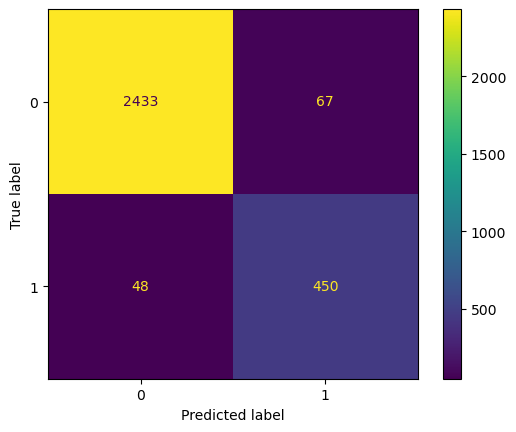

In [78]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

**Decision Tree Splits**

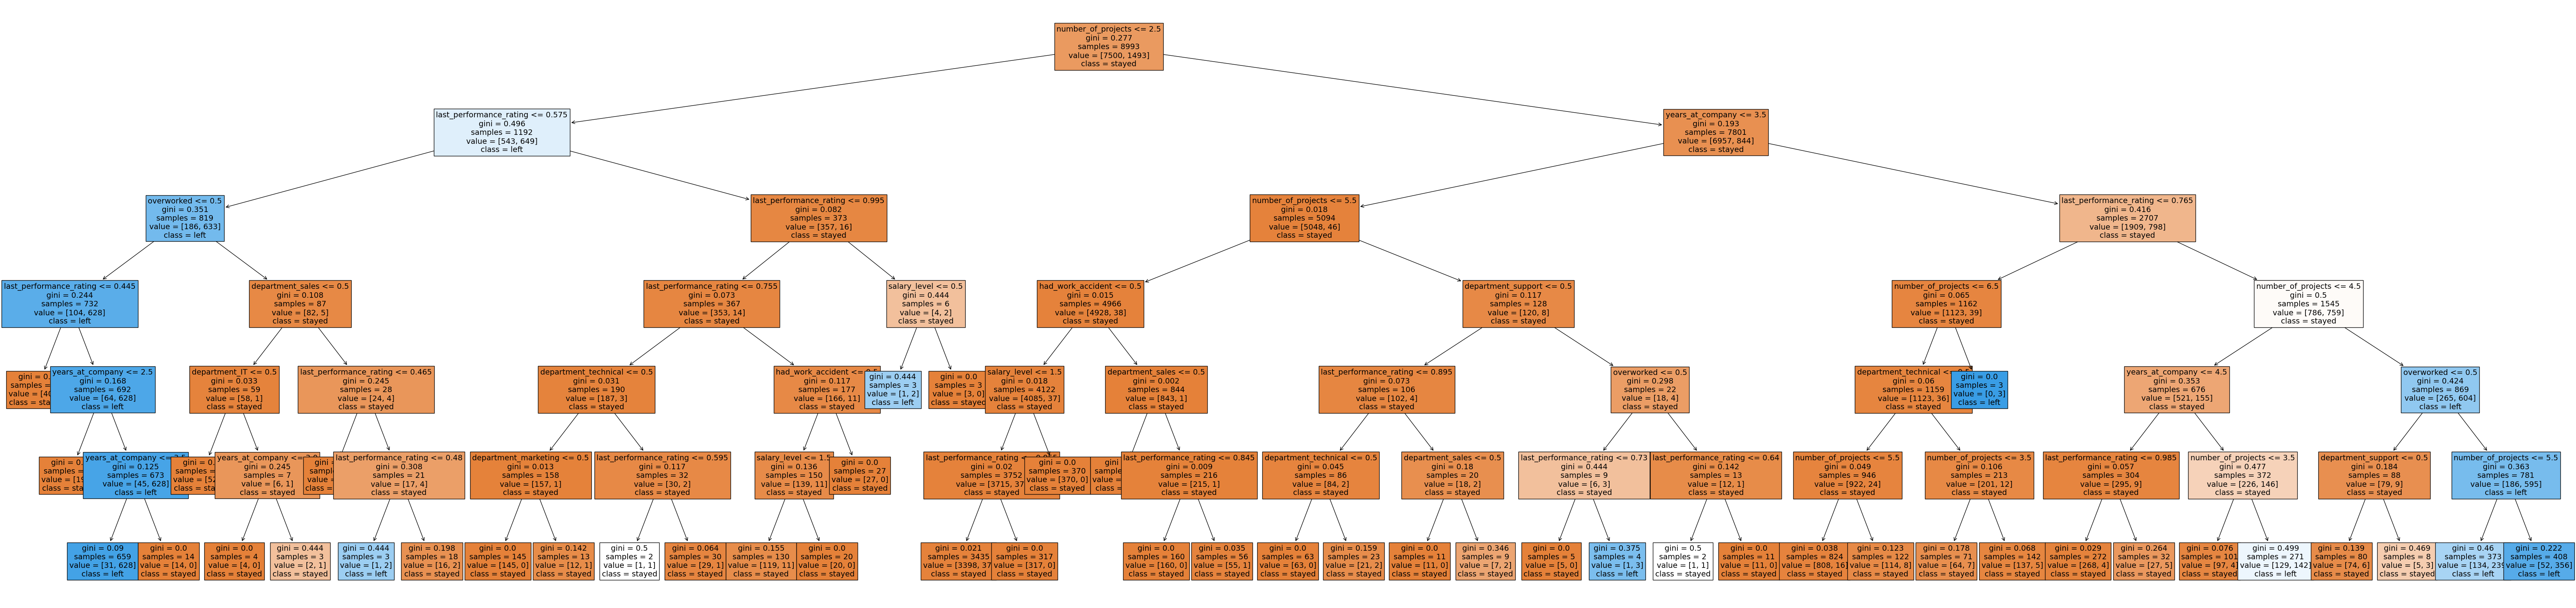

In [79]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [80]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_performance_rating         0.343958
number_of_projects              0.343385
years_at_company                0.215681
overworked                      0.093498
department_support              0.001142
salary_level                    0.000910
department_sales                0.000607
department_technical            0.000418
had_work_accident               0.000183
department_IT                   0.000139
department_marketing            0.000078

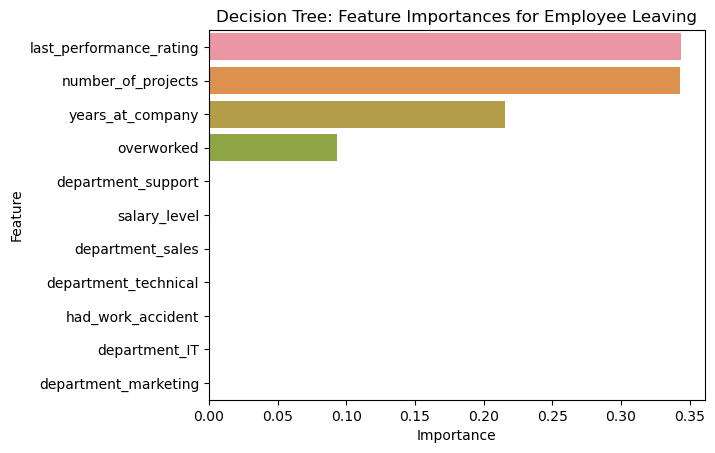

In [81]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

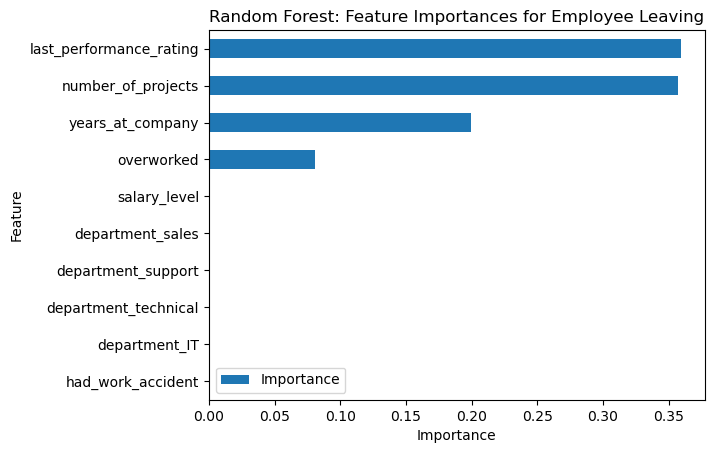

In [82]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()